In [5]:
# Load dataset
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
# Missing values check
df.isnull().mean()*100

,0
Survived,0.00000
Pclass,0.00000
Sex,0.00000
Age,19.86532
Fare,0.00000


In [30]:
# Train test split
from sklearn.model_selection import train_test_split
X = df.drop(['Survived'], axis=1)
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [31]:
# Impute missing values in age by mean
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')

X_train['Age'] = si.fit_transform(X_train[['Age']])
X_test['Age'] = si.transform(X_test[['Age']])

In [32]:
# Apply Ordinal Encoding on Gender
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

X_train['Sex'] = oe.fit_transform(X_train[['Sex']])
X_test['Sex'] = oe.transform(X_test[['Sex']])

In [33]:
# Apply Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [34]:
# Check model score
tree.score(X_test, Y_test)

0.7541899441340782

[Text(0.5089285714285714, 0.9, 'x[1] <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(0.2857142857142857, 0.7, 'x[0] <= 2.5\ngini = 0.382\nsamples = 253\nvalue = [65, 188]'),
 Text(0.39732142857142855, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 'x[3] <= 26.125\ngini = 0.073\nsamples = 132\nvalue = [5, 127]'),
 Text(0.07142857142857142, 0.3, 'x[2] <= 55.5\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'x[3] <= 149.035\ngini = 0.022\nsamples = 88\nvalue = [1, 87]'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'x[3] <= 23.35\ngini = 0.5\nsamples = 121\nvalue = [60, 61]'),
 Text(0.35714285714285715, 0.3, 'x[2] <= 30.25\ngini = 0.481\nsamples = 97\nvalue = [39, 58]'),
 Text(0.32142857142857145, 0.1, '\n  (...)  \n'),
 Text(0.39285714285714285, 0.1, '\n  (...)  \n'),
 

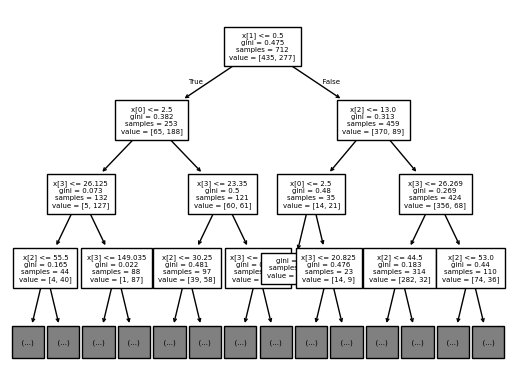

In [35]:
# Plot tree
plot_tree(tree, feature_names=None, fontsize=5, max_depth=3)